## Simple Regressor
좌표평면 위 그래프를 근사하는 회귀 모델

In [150]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

In [151]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(1,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    
    def forward(self, x):
        x = self.main(x)
        return x


In [152]:
class NumberDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y_min = torch.min(y)
        self.y_max = torch.max(y)
        self.y = self.norm(y)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return torch.tensor([self.x[idx]]), torch.tensor([self.y[idx]])
    
    def norm(self,y):
        return (y-torch.min(y))/(torch.max(y)-torch.min(y))
    
    def reverse(self, y):
        return (self.y_max-self.y_min)*y + self.y_min

In [153]:
learning_rate = 1e-3
batch_size = 100
n = 1000

In [154]:
def test_func(f, epoch = 1000, draw = 10):
    model = Regressor()
    epochs = epoch
    
    data_x = torch.tensor([i/n for i in range(n)])
    data_y = f(data_x)
    ds = NumberDataset(data_x,data_y)
    dl = DataLoader(ds, batch_size = batch_size, shuffle=True)

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        for batch, (x,y) in enumerate(dl):
            pred = model(x)
            loss = loss_fn(pred, y)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        with torch.no_grad():
            pred_y = model(data_x.reshape(n,1))
            loss = loss_fn(pred_y, ds.norm(data_y.reshape(n,1)))
            pred_y = ds.reverse(pred_y)
            if loss<1e-4: #early stopping
                break
            if epoch % draw == 0:
                plt.plot(data_x, pred_y, label = f'epoch {epoch+1}')

    plt.scatter(data_x, data_y, label = f'data', color = '#999999')
    plt.legend()

#### Testing

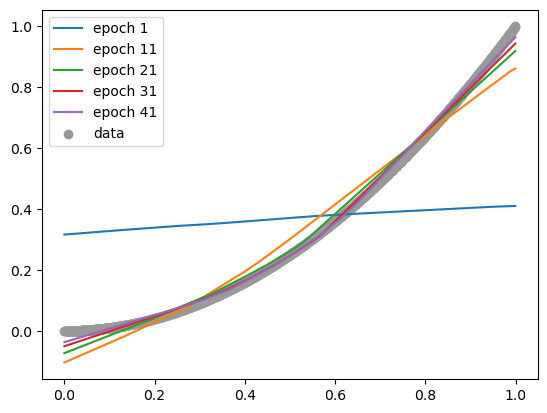

In [155]:
test_func(lambda x:x**2)

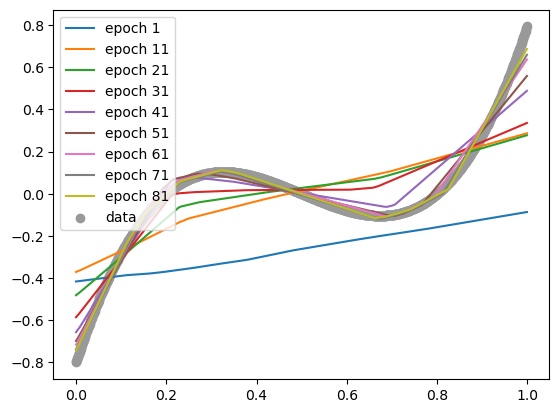

In [156]:
test_func(lambda x:10*(x-0.2)*(x-0.5)*(x-0.8))

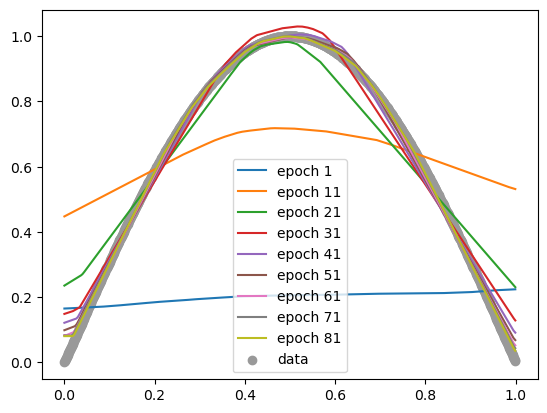

In [158]:
test_func(lambda x:torch.sin(x*torch.pi))

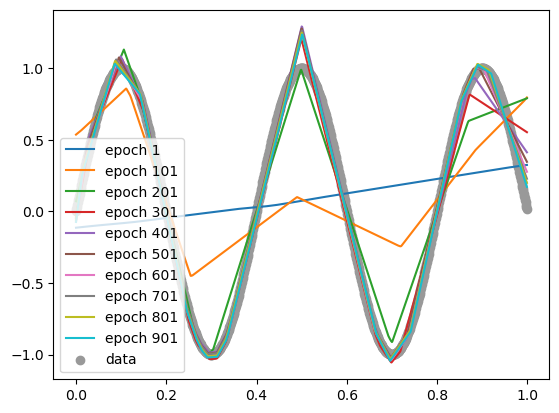

In [161]:
test_func(lambda x:torch.sin(x*torch.pi*5), draw = 100)